In [10]:
import yfinance as yf
import matplotlib.pyplot as plt

from flask import Flask, request, Response

app = Flask(__name__)

def fetch_chart(ticker, period='1mo', interval='1d', technical_indicator='Close'):
    try:
        stock_data = yf.download(ticker, period=period, interval=interval)
        stock_data[technical_indicator].plot(title=f'{ticker} - {technical_indicator} ({period})')
        plt.xlabel('Date')
        plt.ylabel(technical_indicator)
        plt.grid()
        plt.tight_layout()
        plt.savefig('chart.png')
        plt.close()

        with open('chart.png', 'rb') as file:
            chart_bytes = file.read()

        return chart_bytes

    except Exception as e:
        return str(e)

@app.route('/get_chart', methods=['GET'])
def get_chart():
    ticker = request.args.get('ticker')
    period = request.args.get('period', '1mo')
    interval = request.args.get('interval', '1d')
    technical_indicator = request.args.get('indicator', 'Close')

    if not ticker:
        return Response('Ticker not provided.', status=400)

    chart_bytes = fetch_chart(ticker, period, interval, technical_indicator)
    if isinstance(chart_bytes, str):
        return Response(chart_bytes, status=500)

    return Response(chart_bytes, status=200, content_type='image/png')

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\sai\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


[*********************100%***********************]  1 of 1 completed


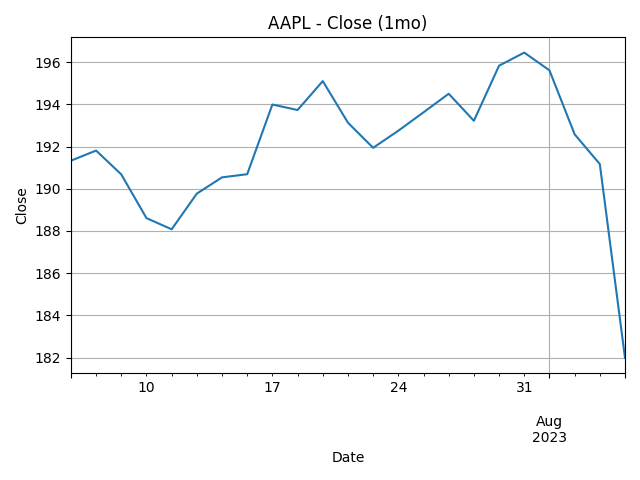

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
from IPython.display import display, Image

def fetch_chart(ticker, period='1mo', interval='1d', technical_indicator='Close'):
    try:
        stock_data = yf.download(ticker, period=period, interval=interval)
        stock_data[technical_indicator].plot(title=f'{ticker} - {technical_indicator} ({period})')
        plt.xlabel('Date')
        plt.ylabel(technical_indicator)
        plt.grid()
        plt.tight_layout()
        plt.savefig('chart.png')
        plt.close()

        with open('chart.png', 'rb') as file:
            chart_bytes = file.read()

        return chart_bytes

    except Exception as e:
        return str(e)

ticker = 'AAPL'
period = '1mo'

chart_bytes = fetch_chart(ticker, period)
display(Image(chart_bytes))

In [8]:
import yfinance as yf
import mplfinance as mpf
from IPython.display import display, Image

def fetch_candle_chart(ticker, period='1mo', interval='1d', num_periods=10):
    try:
        stock_data = yf.download(ticker, period=period, interval=interval)
        stock_data.reset_index(inplace=True)

        # Select the last num_periods from the DataFrame
        stock_data = stock_data.iloc[-num_periods:]

        # Convert the date to a string representation
        stock_data['Date'] = stock_data['Date'].dt.strftime('%Y-%m-%d')

        # Plot the candlestick chart
        mc = mpf.make_marketcolors(up='g', down='r')
        s = mpf.make_mpf_style(marketcolors=mc)
        mpf.plot(stock_data, type='candle', style=s, volume=True, title=f'{ticker} - {period} Candlestick Chart')

    except Exception as e:
        print(str(e))

ticker = input("Enter the stock ticker: ")
period = input("Enter the period (e.g., '1d', '1wk', '1mo'): ")
num_periods = int(input("Enter the number of time periods (e.g., 10): "))

fetch_candle_chart(ticker, period, num_periods=num_periods)

Enter the stock ticker: TATAPOWER.NS
Enter the period (e.g., '1d', '1wk', '1mo'): 1mo
Enter the number of time periods (e.g., 10): 10
[*********************100%***********************]  1 of 1 completed
Expect data.index as DatetimeIndex


C:\Users\sai\AppData\Local\Temp\ipykernel_10304\982620963.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = stock_data['Date'].dt.strftime('%Y-%m-%d')


In [9]:
import yfinance as yf
import mplfinance as mpf
from IPython.display import display, Image

def fetch_candle_chart(ticker, period='1mo', interval='1d', num_periods=10):
    try:
        stock_data = yf.download(ticker, period=period, interval=interval)
        stock_data.reset_index(inplace=True)

        # Select the last num_periods from the DataFrame
        stock_data = stock_data.iloc[-num_periods:].copy()

        # Convert the date to a string representation
        stock_data['Date'] = stock_data['Date'].dt.strftime('%Y-%m-%d')

        # Plot the candlestick chart
        mc = mpf.make_marketcolors(up='g', down='r')
        s = mpf.make_mpf_style(marketcolors=mc)
        mpf.plot(stock_data, type='candle', style=s, volume=True, title=f'{ticker} - {period} Candlestick Chart')

    except Exception as e:
        print(str(e))

ticker = input("Enter the stock ticker: ")
period = input("Enter the period (e.g., '1d', '1wk', '1mo'): ")
num_periods = int(input("Enter the number of time periods (e.g., 10): "))

fetch_candle_chart(ticker, period, num_periods=num_periods)


Enter the stock ticker:  TATAPOWER.NS
Enter the period (e.g., '1d', '1wk', '1mo'): 1wk
Enter the number of time periods (e.g., 10): 10
[*********************100%***********************]  1 of 1 completed
Expect data.index as DatetimeIndex
